**Introdução Data Mining - Dataset Mushrooms**

In [2]:
# Bibliotecas para carregar/manipular os dados
import pandas as pd
import numpy as np

# Bibliotecas para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report)


In [3]:
# Carrega a base de dados mushrooms disponível no próprio Kaggle e adicionado neste notebook
mushrooms = pd.read_csv("mushrooms.csv")


In [4]:
mushrooms.head() #exibe as 5 (cinco) primeiras linhas do dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Breve análise exploratória do dataset
# Quantidade de linhas agrupadas pelas classes comestiveis e venenosas
print(mushrooms.groupby('class').size(), '\n')

# View geral do dataset
mushrooms.info()

class
e    4208
p    3916
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color         

**Gráfico de Dispersão (Scatter - Rapidminer)**

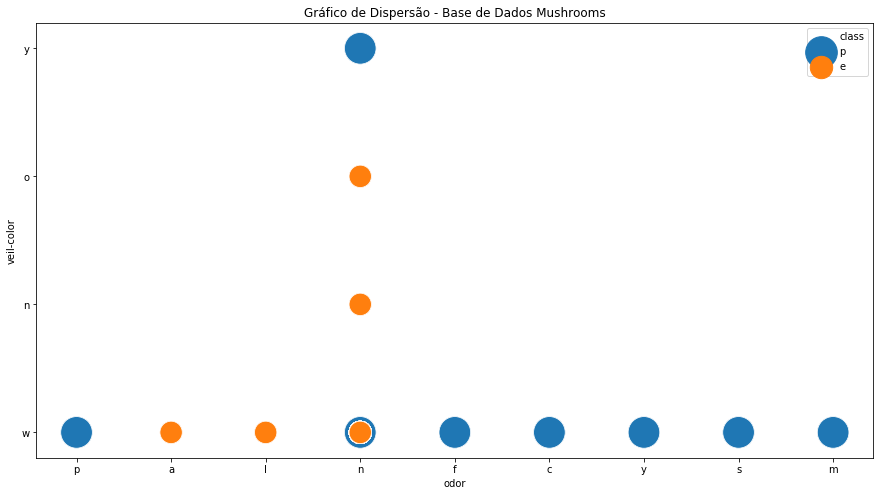

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

# Não consegui colocar o jitter como parâmetro da função scatterplot
sns.scatterplot(x='odor',  y='veil-color', data=mushrooms, hue='class', size='class', sizes=(500, 1000))

ax.set(xlabel='odor',
       ylabel='veil-color',
       title='Gráfico de Dispersão - Base de Dados Mushrooms',
       )

plt.show()
# É possível identificar por ex. que o odor igual a 'n' e o veil_color igual a 'w'
# é o único local onde há interseção entre as classes venenosas e comestiveis

**Split no dataset entre treino e teste**

In [7]:
features = mushrooms.iloc[:, 1:23] # Seleciona os dados sem as classes na variável features
labels = mushrooms.iloc[:,0] # Seleciona os dados das classes na variável labels


# Conversão das features para valores inteiros
features = pd.get_dummies(features)

# Realiza a divisão do dataset inserindo 20% dos dados para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels)

**Conferência do split realizado no dataset entre treino e teste**

In [8]:
print(y_train.value_counts(), '\n') # Valores de classe utilizados para treino
print(y_test.value_counts()) # Valores de classe utilizados para teste

e    3366
p    3133
Name: class, dtype: int64 

e    842
p    783
Name: class, dtype: int64


In [9]:
# A variável X_train recebe a porção de dados usado para treinar o modelo.
# Este contém apenas os dados (80% deles), sem as classes:
X_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
52,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7500,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3614,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
217,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
7856,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
5908,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3615,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
619,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3855,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
5801,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [10]:
# As classes dos dados de treino estão na variável y_train:
y_train

52      e
7500    e
3614    p
217     e
7856    p
5908    p
3615    e
619     e
3855    e
5801    p
590     p
5013    p
450     e
7986    e
3564    e
5378    e
3041    p
7606    p
7212    p
6505    p
6696    p
7122    p
7819    p
1236    e
2446    e
6991    p
7151    p
4504    p
1383    e
6304    p
       ..
3878    p
4279    p
174     e
3741    p
2750    e
1162    e
579     p
4227    p
4810    p
2271    e
4444    e
2607    e
6895    p
4109    e
7048    p
1169    e
527     e
1313    e
3863    e
4408    p
1142    e
1052    e
3944    p
7657    p
4633    p
2029    e
194     e
4926    e
4778    p
4520    p
Name: class, Length: 6499, dtype: object

In [11]:
# Já a variável X_test estão os dados (20% deles) usados para testar o modelo 
# (dados que o modelo não conhece)
X_test

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3744,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1840,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4658,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5414,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2620,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6074,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
134,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
7581,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4860,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3869,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [12]:
# As classes dos dados de teste estão na variável y_test
y_test

3744    e
1840    e
4658    p
5414    p
2620    e
6074    p
134     e
7581    e
4860    e
3869    p
8019    e
5097    p
5640    e
2742    e
1276    e
4721    p
7105    p
4210    p
2553    e
1249    e
5174    p
5161    p
2059    e
1599    e
6407    p
1233    e
483     e
6416    p
4070    p
893     e
       ..
7165    p
2064    e
790     e
3082    p
7664    e
6404    p
4076    e
7338    p
3337    p
1338    e
4088    p
2313    e
7248    p
5383    p
4563    p
6768    p
5061    p
3216    e
2031    e
5298    p
1790    p
7851    p
3892    p
2198    e
1140    e
6887    p
3731    e
4123    p
5282    p
6236    p
Name: class, Length: 1625, dtype: object

**Aplicando a Árvore de Decisão**

In [13]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = None) # Instanciando uma árvore para classificação 

model = model.fit(X_train, y_train) # Constrói o modelo a partir da base de treinamento
#score = model.score(X_train, y_train)
#print(score)

y_pred = model.predict(X_test) # Utiliza o modelo treinado para realizar
                               # previsões sobre a base teste desconhecida 

accuracy = accuracy_score(y_test, y_pred) # Verifica a acurácia do modelo

print(f'Acurária obtida por meio do modelo árvore de Decisão: {accuracy:.2%}')

Acurária obtida por meio do modelo árvore de Decisão: 100.00%


**Matrix de Confusão com Pandas Crosstab**

In [14]:
pd.crosstab(y_pred,
            y_test,
            rownames=['Previsto'],
            colnames=['Real'],
            margins=True)

Real,e,p,All
Previsto,,,
e,842,0,842
p,0,783,783
All,842,783,1625


In [15]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**Visualização da Árvore de Decisão**

In [ ]:
feature_names = features.columns.to_list() # Lista contendo o nome dos atributos 

plot_data = export_graphviz(model,
                           #max_depth=10,
                           feature_names=feature_names, 
                           filled=True, rounded=True, 
                           special_characters=True,
                          leaves_parallel=True) 

graphviz.Source(plot_data)